## Libraries

In [52]:
# Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, classification_report, confusion_matrix
)

# Imbalanced-learn
from imblearn.over_sampling import SMOTE

# XGBoost
import xgboost as xgb

# Counter
from collections import Counter

# Imputation
from sklearn.impute import SimpleImputer

In [54]:
df = pd.read_csv("credit_risk_data7555.csv")

## Exploratory Data Analysis EDA

In [62]:
# Column names
df.columns

Index(['Age', 'Gender', 'Income', 'LoanAmount', 'CreditScore', 'Education',
       'EmploymentStatus', 'MaritalStatus', 'DebtToIncomeRatio',
       'InterestRate', 'NumOfAccounts', 'Defaulted'],
      dtype='object')

In [64]:
# First Few Rows
df.head()

,Age,Gender,Income,LoanAmount,CreditScore,Education,EmploymentStatus,MaritalStatus,DebtToIncomeRatio,InterestRate,NumOfAccounts,Defaulted
0,56.0,Male,53411.0,45186.0,310.0,Bachelors,Employed,Single,0.254789,9.34,7,0
1,69.0,Male,NaN,4893.0,515.0,Masters,Employed,Divorced,0.116753,9.36,7,0
2,46.0,Male,36399.0,71062.0,300.0,Bachelors,Unemployed,Married,0.498684,11.49,5,1
3,32.0,Male,29563.0,18430.0,589.0,Masters,Self-employed,Divorced,0.055602,8.46,9,0
4,60.0,Female,NaN,78786.0,805.0,High School,Unemployed,Married,0.640647,10.30,3,1


In [70]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                75840 non-null  float64
 1   Gender             79136 non-null  object 
 2   Income             77520 non-null  float64
 3   LoanAmount         74880 non-null  float64
 4   CreditScore        76320 non-null  float64
 5   Education          80000 non-null  object 
 6   EmploymentStatus   78080 non-null  object 
 7   MaritalStatus      80000 non-null  object 
 8   DebtToIncomeRatio  77520 non-null  float64
 9   InterestRate       80000 non-null  float64
 10  NumOfAccounts      80000 non-null  int64  
 11  Defaulted          80000 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 7.3+ MB


In [72]:
# Data types in dataset
df.dtypes

Age                  float64
Gender                object
Income               float64
LoanAmount           float64
CreditScore          float64
Education             object
EmploymentStatus      object
MaritalStatus         object
DebtToIncomeRatio    float64
InterestRate         float64
NumOfAccounts          int64
Defaulted              int64
dtype: object

In [10]:
# shape of data
df.shape

(80000, 12)

## Detecting and Handling Outliers

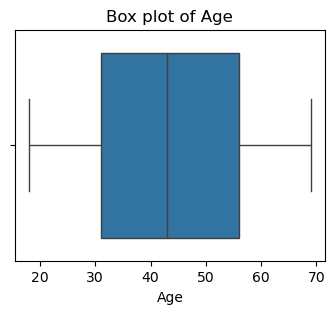

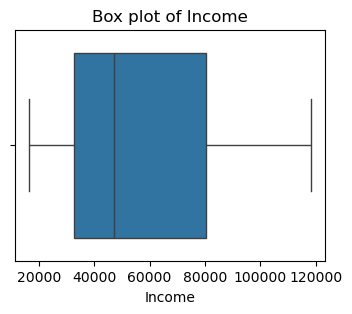

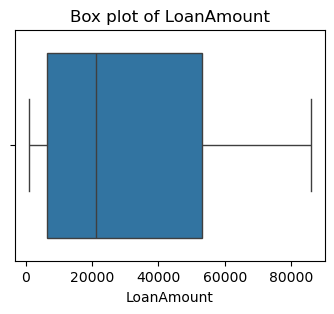

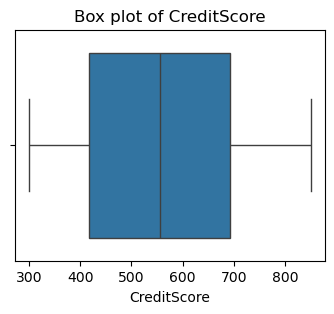

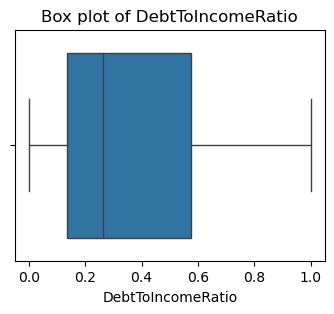

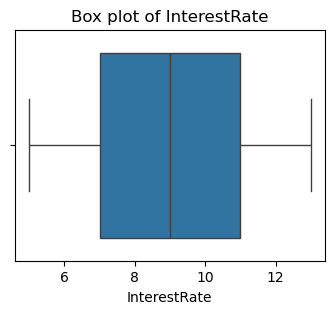

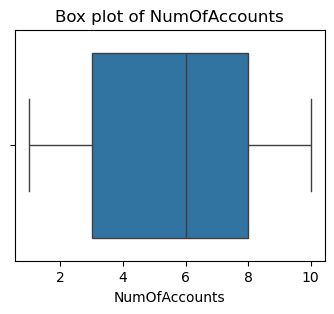

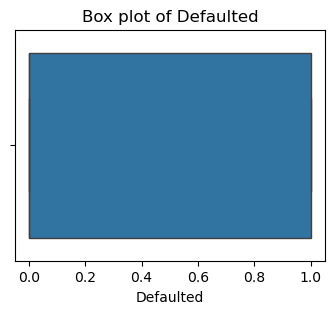

In [74]:
# Individual box plots for outliers
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(4, 3))  
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()


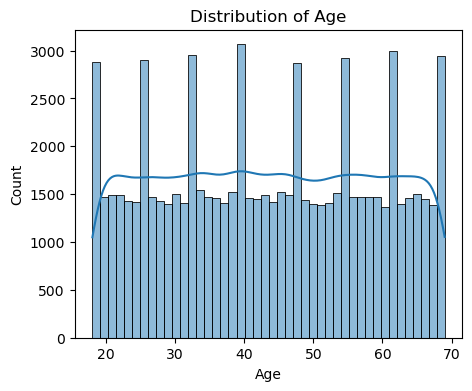

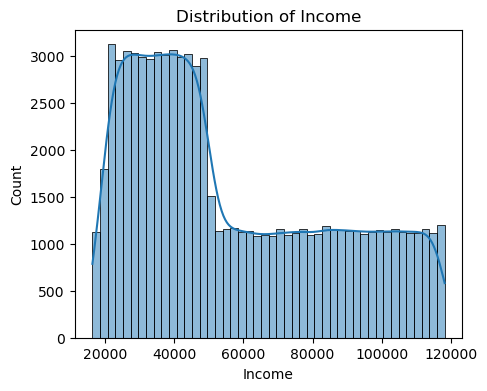

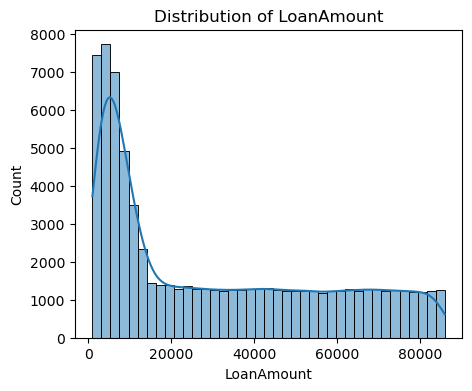

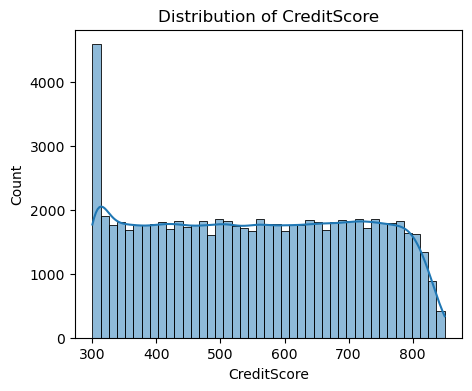

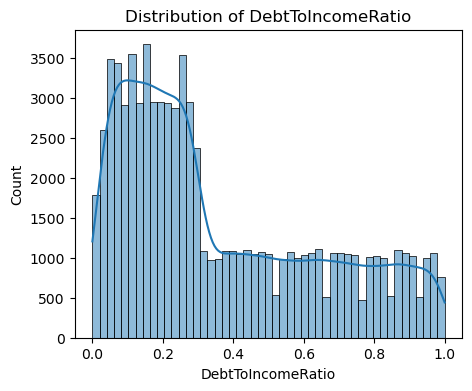

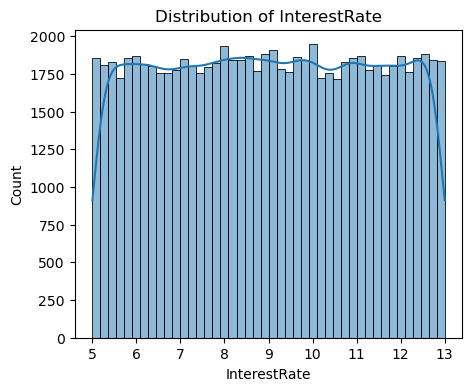

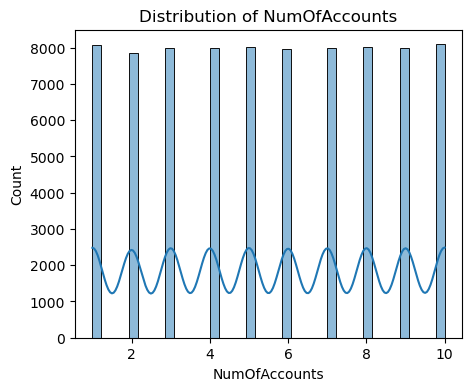

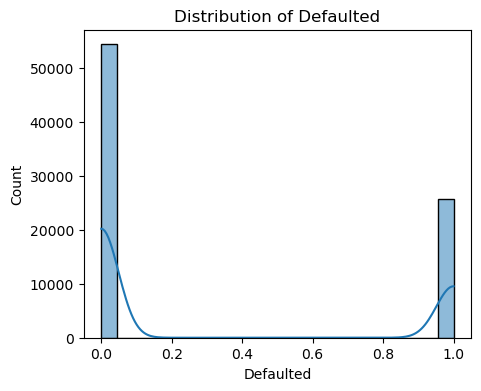

In [76]:
# Individual histograms for outliers distributions 
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(5, 4))  # Adjust the size here (width, height)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


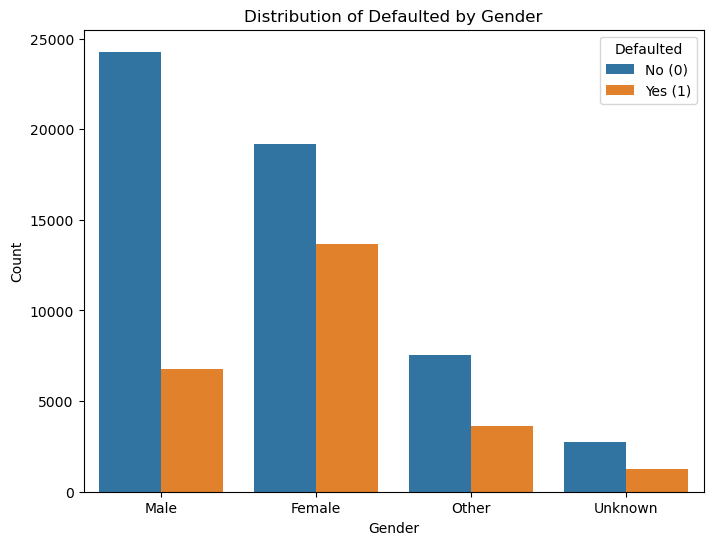

In [16]:
# Create a grouped plots (Gender vs Defaulted)
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Gender", hue="Defaulted")
plt.title("Distribution of Defaulted by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Defaulted", labels=["No (0)", "Yes (1)"])
plt.show()


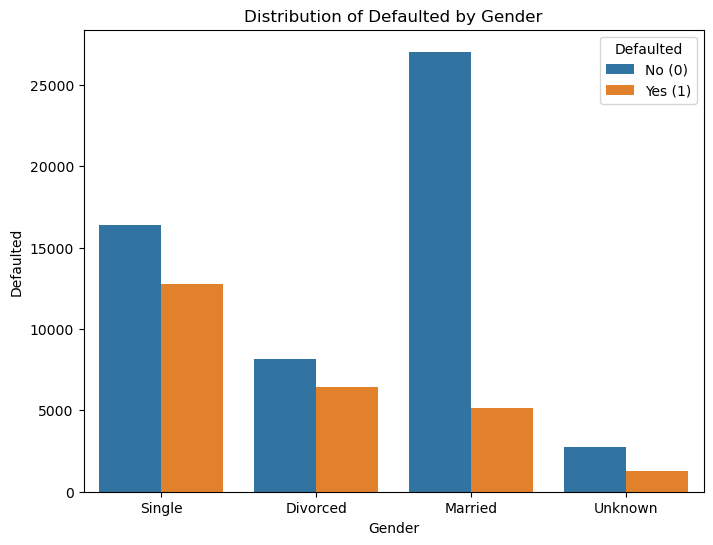

In [78]:
# Create a grouped  plots (MaritalStatus vs Defaulted)
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="MaritalStatus", hue="Defaulted")
plt.title("Distribution of Defaulted by Gender")
plt.xlabel("Gender")
plt.ylabel("Defaulted")
plt.legend(title="Defaulted", labels=["No (0)", "Yes (1)"])
plt.show()

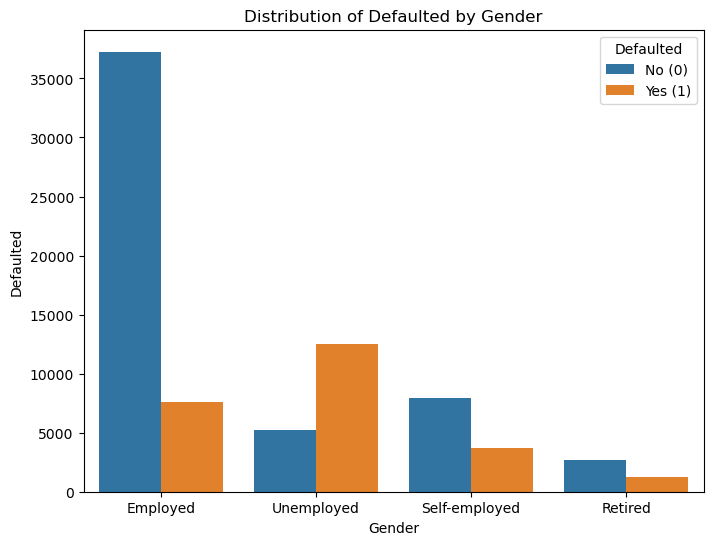

In [80]:
# Create a grouped  plots (EmploymentStatus vs Defaulted)
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="EmploymentStatus", hue="Defaulted")
plt.title("Distribution of Defaulted by Gender")
plt.xlabel("Gender")
plt.ylabel("Defaulted")
plt.legend(title="Defaulted", labels=["No (0)", "Yes (1)"])
plt.show()


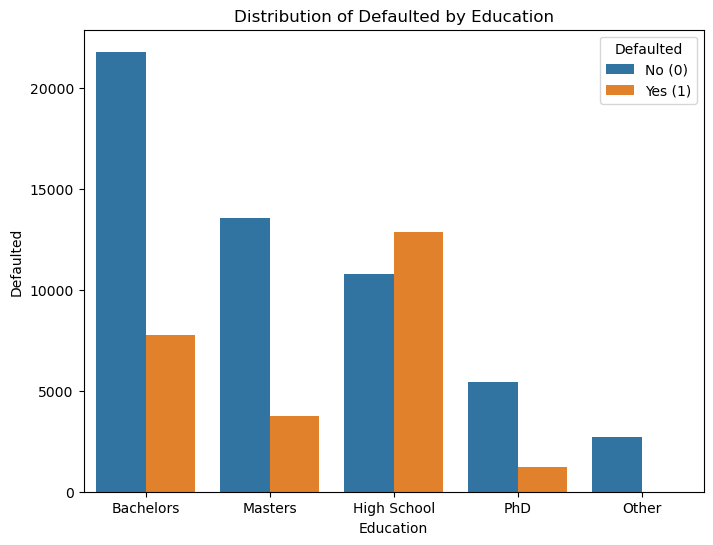

In [82]:
# Create a grouped  plots (Education vs Defaulted)
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Education", hue="Defaulted")
plt.title("Distribution of Defaulted by Education")
plt.xlabel("Education")
plt.ylabel("Defaulted")
plt.legend(title="Defaulted", labels=["No (0)", "Yes (1)"])
plt.show()


In [90]:
# Target column
df['Defaulted'].value_counts()

# Not Defaulted (0) = 54341 
# Defaulted (1) = 25659

Defaulted
0    54341
1    25659
Name: count, dtype: int64

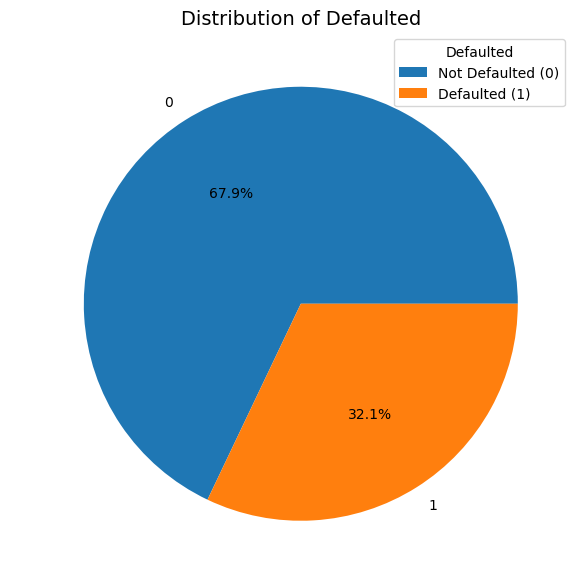

In [92]:
# Y - Variable plot (Defaulted)
plt.figure(figsize=(7, 8))
df['Defaulted'].value_counts().plot(kind='pie', autopct=lambda p: f'{p:.1f}%')
plt.legend(title="Defaulted", labels=["Not Defaulted (0)", "Defaulted (1)"])
plt.title("Distribution of Defaulted",  fontsize=14)
plt.ylabel(" ")
plt.show()

## Feature Engineering¶

In [ ]:
# Adding a new feature called LoanIncomeRatio & CreditScoreCategory 

In [102]:
# New feature LoanIncomeRatio
df['LoanIncomeRatio'] = df['LoanAmount'] / df['Income']

# Removing Outlier using IQR
# Calculate IQR
Q1 = df['LoanIncomeRatio'].quantile(0.25)
Q3 = df['LoanIncomeRatio'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Caping the values 
df['LoanIncomeRatio'] = df['LoanIncomeRatio'].clip(lower=lower_bound, upper=upper_bound)



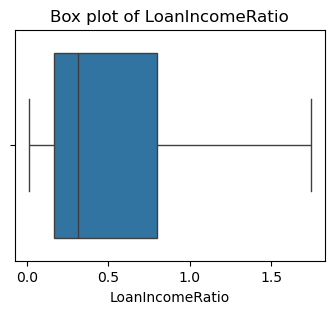

In [104]:
# Individual box plots for outliers
plt.figure(figsize=(4, 3))  
sns.boxplot(x=df['LoanIncomeRatio'])
plt.title(f'Box plot of LoanIncomeRatio')
plt.show()


In [110]:
df['CreditScore'].min()


300.0

In [112]:
df['CreditScore'].max()

850.0

In [114]:
# New feature CreditScoreCategory
print(df['CreditScore'].min()) # min value
print(df['CreditScore'].max()) # max value

bins = [0, 600, 700, 800, 850]  
labels = ['Poor', 'Average', 'Good', 'Excellent']  

#  New column for CreditScore categories
df['CreditScoreCategory'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, right=False)

# Head
print(df[['CreditScore', 'CreditScoreCategory']].head())


300.0
850.0
   CreditScore CreditScoreCategory
0        310.0                Poor
1        515.0                Poor
2        300.0                Poor
3        589.0                Poor
4        805.0           Excellent


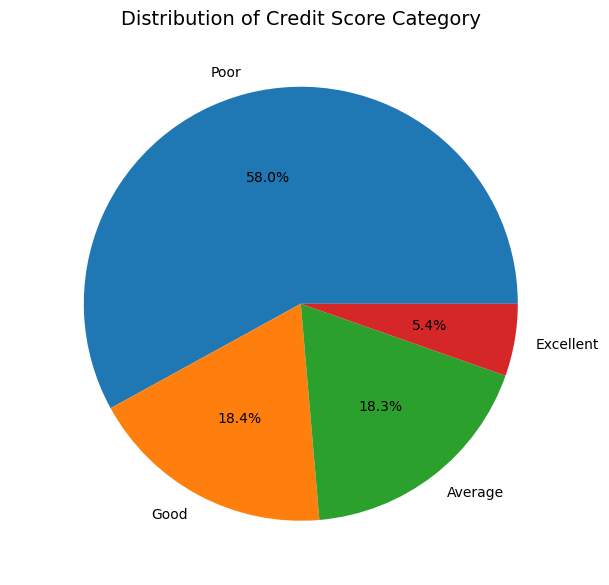

In [116]:
# Pie Plot for CreditScoreCategory
plt.figure(figsize=(7, 8))
df['CreditScoreCategory'].value_counts().plot(kind='pie', autopct=lambda p: f'{p:.1f}%')
plt.title("Distribution of Credit Score Category",  fontsize=14)
plt.ylabel(" ")
plt.show()

## Handling Missing (Null) Values using SimpleImputer

In [123]:
# Check for missing null values
print(df.isnull().sum())

Age                    4160
Gender                  864
Income                 2480
LoanAmount             5120
CreditScore            3680
Education                 0
EmploymentStatus       1920
MaritalStatus             0
DebtToIncomeRatio      2480
InterestRate              0
NumOfAccounts             0
Defaulted                 0
LoanIncomeRatio        7414
CreditScoreCategory    3726
dtype: int64


In [126]:
# Separate numeric and categorical features for imputation
numeric_features = df.select_dtypes(include=np.number).columns # numeric
categorical_features = df.select_dtypes(include=['object', 'category']).columns  # categorical

# Impute numeric features using the median
num_imputer = SimpleImputer(strategy='median')
df[numeric_features] = num_imputer.fit_transform(df[numeric_features])

# Impute categorical features using the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

# Check for any remaining missing values
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Age                    0
Gender                 0
Income                 0
LoanAmount             0
CreditScore            0
Education              0
EmploymentStatus       0
MaritalStatus          0
DebtToIncomeRatio      0
InterestRate           0
NumOfAccounts          0
Defaulted              0
LoanIncomeRatio        0
CreditScoreCategory    0
dtype: int64


## Handling Inconsistent Data¶

In [128]:
# Categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Unique values for each categorical columns
for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print("-" * 50)


Column: Gender
Unique Values: ['Male' 'Female' 'Other' 'Unknown']
--------------------------------------------------
Column: Education
Unique Values: ['Bachelors' 'Masters' 'High School' 'PhD' 'Other']
--------------------------------------------------
Column: EmploymentStatus
Unique Values: ['Employed' 'Unemployed' 'Self-employed' 'Retired']
--------------------------------------------------
Column: MaritalStatus
Unique Values: ['Single' 'Divorced' 'Married' 'Unknown']
--------------------------------------------------
Column: CreditScoreCategory
Unique Values: ['Poor' 'Excellent' 'Average' 'Good']
--------------------------------------------------


In [164]:
# Standardize the Gender and MaritalStatus columns (unknown to other)
df['Gender'] = df['Gender'].replace({'Unknown': 'Other'})
print('Gender :' )
print(df['Gender'].unique())

print('')

df['MaritalStatus'] = df['MaritalStatus'].replace({'Unknown': 'Other'})
print('MaritalStatus :')
print(df['MaritalStatus'].unique())


Gender :
['Male' 'Female' 'Other']

MaritalStatus :
['Single' 'Divorced' 'Married' 'Other']


## Encoding Categorical Variables 

In [170]:
# Perform one-hot encoding on the categorical features
categorical_features = ['MaritalStatus', 'Education', 'EmploymentStatus', 'Gender', 'CreditScoreCategory']

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)  


df.head()


,Age,Income,LoanAmount,CreditScore,DebtToIncomeRatio,InterestRate,NumOfAccounts,Defaulted,LoanIncomeRatio,MaritalStatus_Married,...,Education_Other,Education_PhD,EmploymentStatus_Retired,EmploymentStatus_Self-employed,EmploymentStatus_Unemployed,Gender_Male,Gender_Other,CreditScoreCategory_Excellent,CreditScoreCategory_Good,CreditScoreCategory_Poor
0,56.0,53411.0,45186.0,310.0,0.254789,9.34,7.0,0.0,0.846006,False,...,False,False,False,False,False,True,False,False,False,True
1,69.0,47141.5,4893.0,515.0,0.116753,9.36,7.0,0.0,0.314826,False,...,False,False,False,False,False,True,False,False,False,True
2,46.0,36399.0,71062.0,300.0,0.498684,11.49,5.0,1.0,1.741227,True,...,False,False,False,False,True,True,False,False,False,True
3,32.0,29563.0,18430.0,589.0,0.055602,8.46,9.0,0.0,0.623414,False,...,False,False,False,True,False,True,False,False,False,True
4,60.0,47141.5,78786.0,805.0,0.640647,10.30,3.0,1.0,0.314826,True,...,False,False,False,False,True,False,False,True,False,False


# Correlation 

<Axes: >

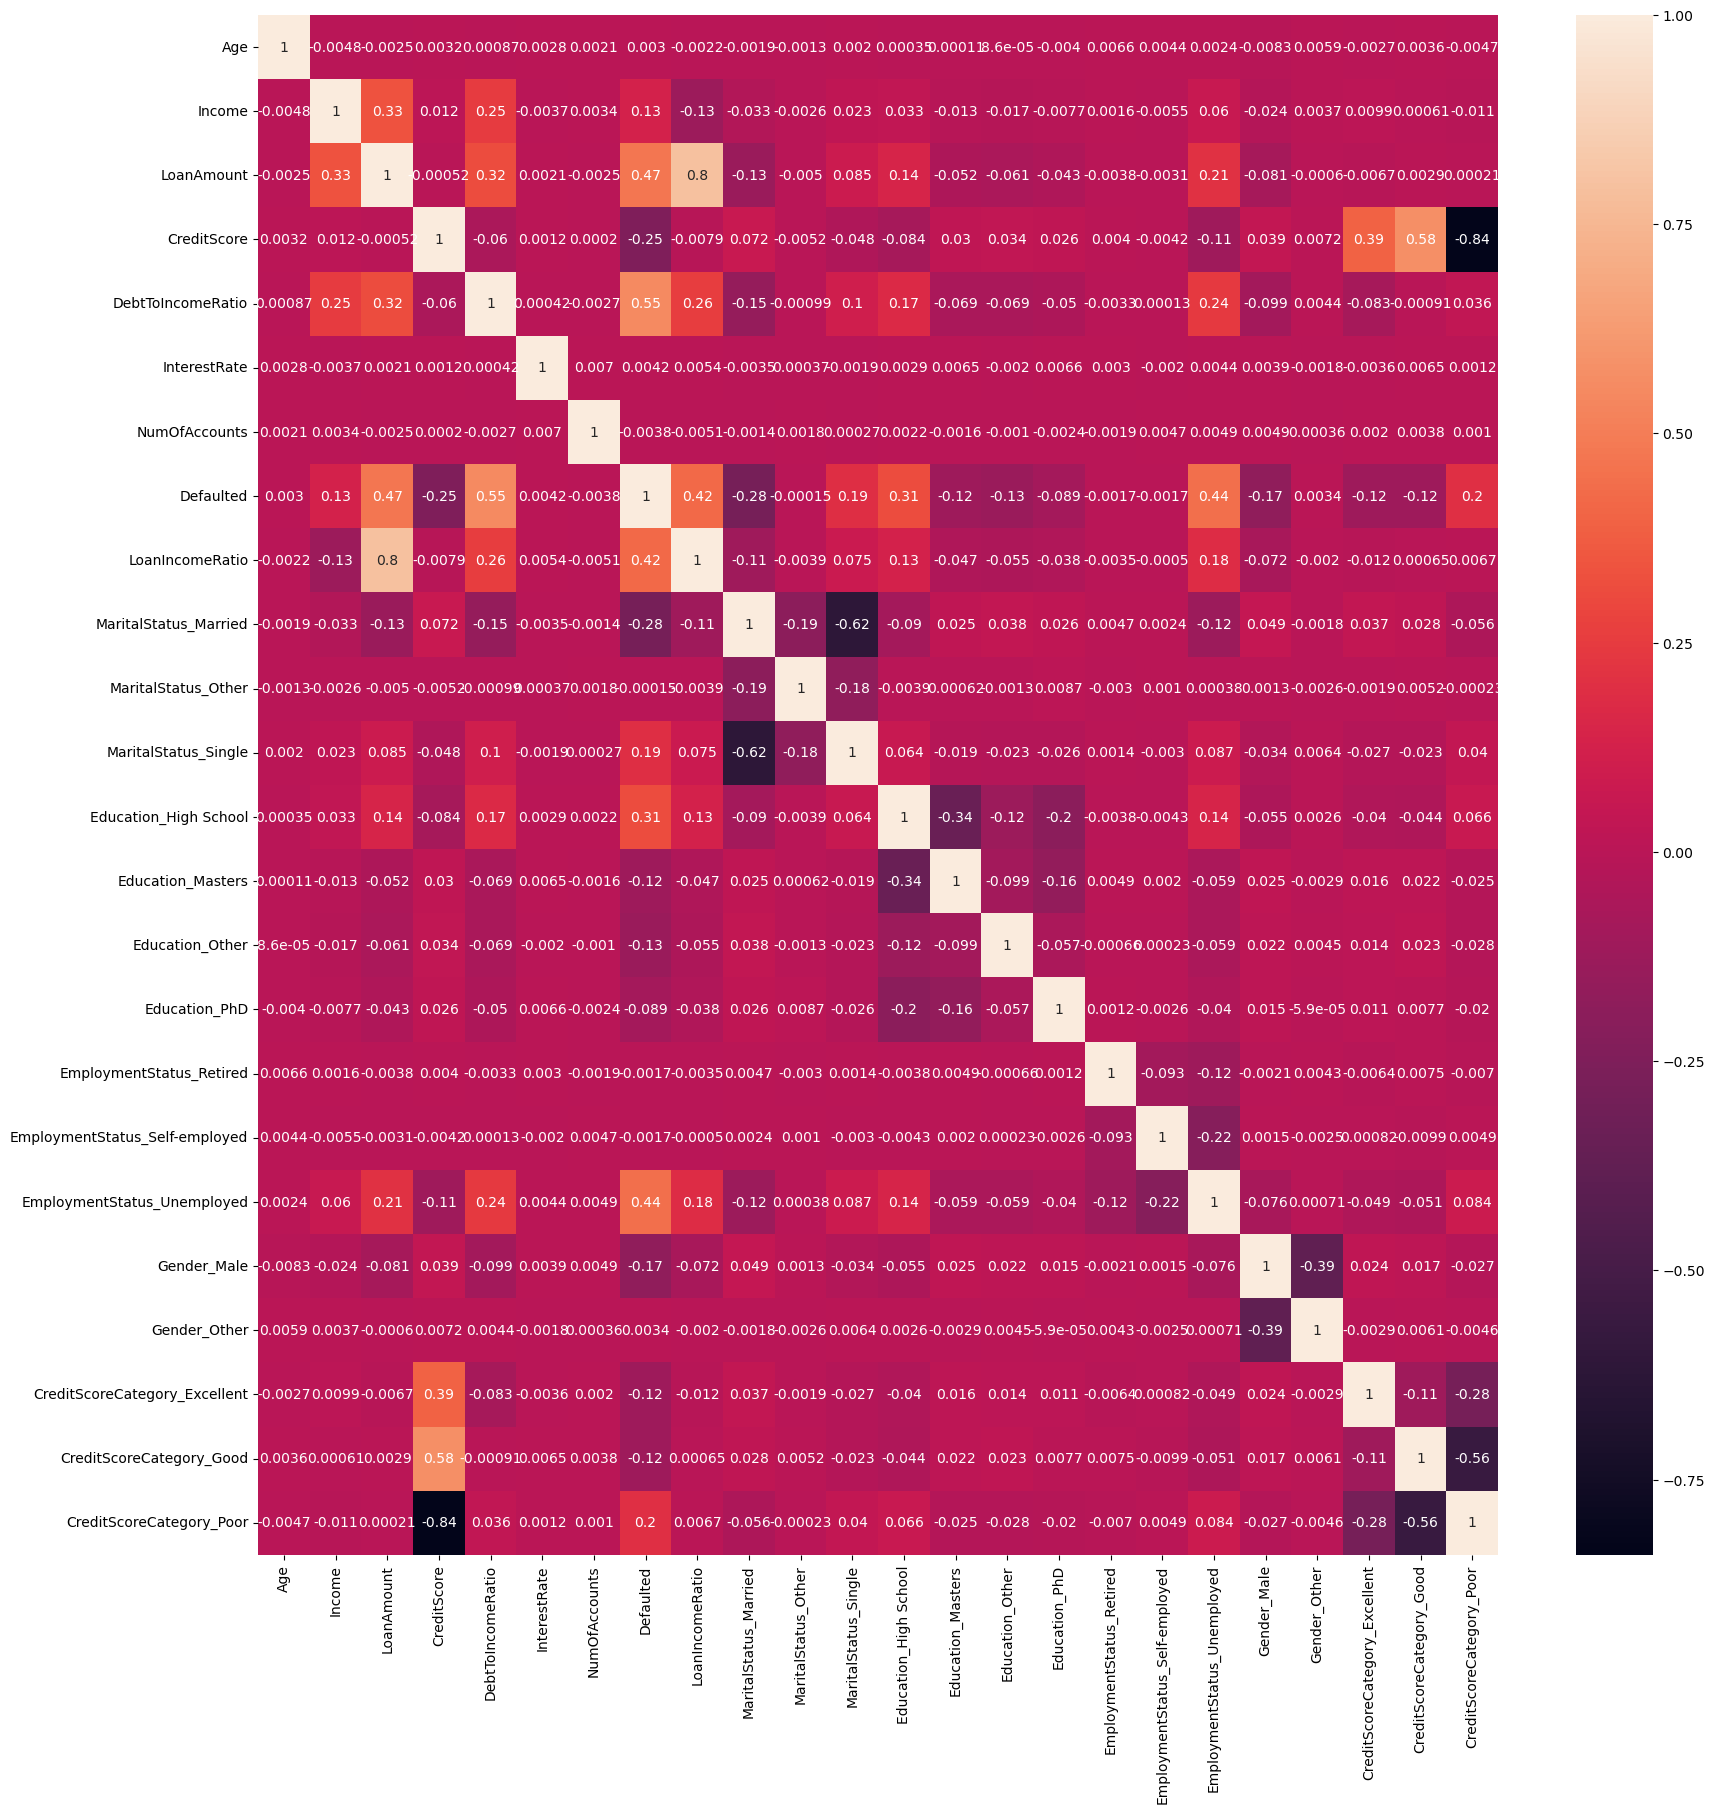

In [176]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

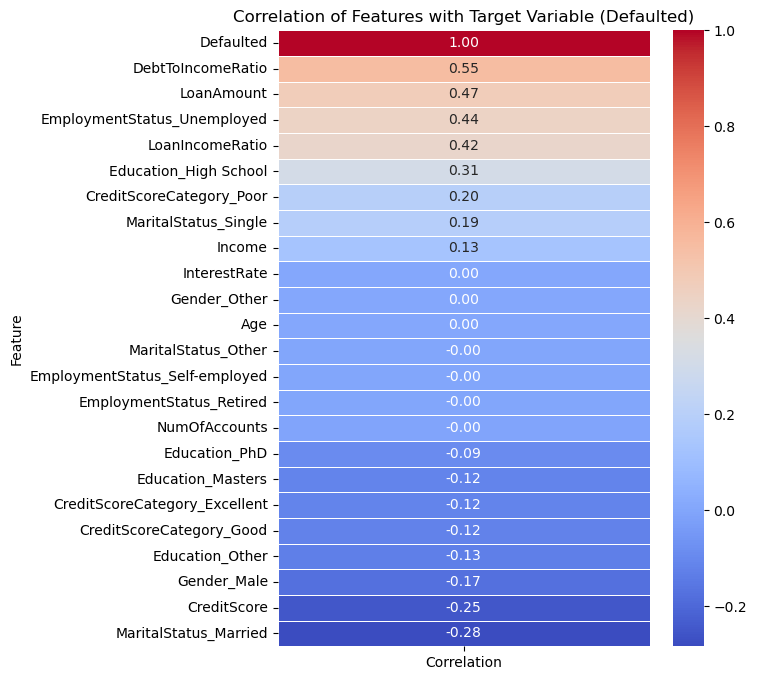

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation of all features with 'Defaulted'
correlation_with_target = df.corr()['Defaulted'].sort_values(ascending=False)

# Convert to a DataFrame for easier plotting
correlation_df = correlation_with_target.to_frame().reset_index()
correlation_df.columns = ['Feature', 'Correlation']

# heatmap 
plt.figure(figsize=(6, 8))
sns.heatmap(correlation_df.set_index('Feature'), annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation of Features with Target Variable (Defaulted)')
plt.show()


# Train - Test Split

In [183]:
# X - all features excluding Defaulted
X = df.drop(columns = 'Defaulted')

# Separate the y variable
y = df['Defaulted']

In [185]:
display(y.head())
display(y.tail())

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Defaulted, dtype: float64

79995    0.0
79996    0.0
79997    0.0
79998    1.0
79999    0.0
Name: Defaulted, dtype: float64

In [187]:
display(X.head())
display(X.tail())

,Age,Income,LoanAmount,CreditScore,DebtToIncomeRatio,InterestRate,NumOfAccounts,LoanIncomeRatio,MaritalStatus_Married,MaritalStatus_Other,...,Education_Other,Education_PhD,EmploymentStatus_Retired,EmploymentStatus_Self-employed,EmploymentStatus_Unemployed,Gender_Male,Gender_Other,CreditScoreCategory_Excellent,CreditScoreCategory_Good,CreditScoreCategory_Poor
0,56.0,53411.0,45186.0,310.0,0.254789,9.34,7.0,0.846006,False,False,...,False,False,False,False,False,True,False,False,False,True
1,69.0,47141.5,4893.0,515.0,0.116753,9.36,7.0,0.314826,False,False,...,False,False,False,False,False,True,False,False,False,True
2,46.0,36399.0,71062.0,300.0,0.498684,11.49,5.0,1.741227,True,False,...,False,False,False,False,True,True,False,False,False,True
3,32.0,29563.0,18430.0,589.0,0.055602,8.46,9.0,0.623414,False,False,...,False,False,False,True,False,True,False,False,False,True
4,60.0,47141.5,78786.0,805.0,0.640647,10.30,3.0,0.314826,True,False,...,False,False,False,False,True,False,False,True,False,False


,Age,Income,LoanAmount,CreditScore,DebtToIncomeRatio,InterestRate,NumOfAccounts,LoanIncomeRatio,MaritalStatus_Married,MaritalStatus_Other,...,Education_Other,Education_PhD,EmploymentStatus_Retired,EmploymentStatus_Self-employed,EmploymentStatus_Unemployed,Gender_Male,Gender_Other,CreditScoreCategory_Excellent,CreditScoreCategory_Good,CreditScoreCategory_Poor
79995,43.0,57784.0,41051.0,696.0,0.136303,9.87,3.0,0.710422,True,False,...,False,True,False,False,False,False,False,False,False,False
79996,63.0,72880.0,21045.0,445.0,0.596343,5.40,9.0,0.314826,True,False,...,False,False,False,False,False,False,False,False,False,True
79997,48.0,47854.0,2018.0,318.0,0.042170,8.43,9.0,0.042170,True,False,...,False,False,False,False,False,False,True,False,False,True
79998,56.0,87624.0,9887.0,607.0,0.730784,12.29,10.0,0.112834,False,False,...,False,False,False,False,True,True,False,False,False,False
79999,58.0,77287.0,13744.0,675.0,0.333021,11.37,2.0,0.177831,True,False,...,False,False,False,True,False,False,False,False,False,False


In [205]:
# train_test_
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [207]:
X_train.head()

,Age,Income,LoanAmount,CreditScore,DebtToIncomeRatio,InterestRate,NumOfAccounts,LoanIncomeRatio,MaritalStatus_Married,MaritalStatus_Other,...,Education_Other,Education_PhD,EmploymentStatus_Retired,EmploymentStatus_Self-employed,EmploymentStatus_Unemployed,Gender_Male,Gender_Other,CreditScoreCategory_Excellent,CreditScoreCategory_Good,CreditScoreCategory_Poor
52414,33.0,38287.0,42924.0,567.0,0.027464,11.46,9.0,1.121112,True,False,...,False,False,False,False,False,True,False,False,False,True
34289,20.0,91634.0,83774.0,300.0,0.563469,9.54,10.0,0.914224,True,False,...,False,False,False,True,False,False,False,False,False,True
56824,37.0,118012.0,28562.0,422.0,0.055602,12.30,3.0,0.242026,True,False,...,False,False,True,False,False,False,False,False,False,True
149,44.0,47475.0,8694.0,460.0,0.183128,8.14,1.0,0.183128,True,False,...,False,False,False,False,False,False,False,False,False,True
46195,38.0,24630.0,1060.0,575.0,0.043037,8.79,2.0,0.043037,True,False,...,False,False,False,False,False,False,False,False,False,True


# Data Modelling

 LogisticRegression,  
 
 RandomForestClassifier,
 
 XGBClassifier,
 
 GradientBoostingClassifier,

### LogisticRegression

Accuracy: 0.81655
Precision: 0.7401901469317199
Recall: 0.6640818858560794
F1 Score: 0.7000735714869615
ROC-AUC: 0.878000779462473

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87     13552
         1.0       0.74      0.66      0.70      6448

    accuracy                           0.82     20000
   macro avg       0.79      0.78      0.78     20000
weighted avg       0.81      0.82      0.81     20000



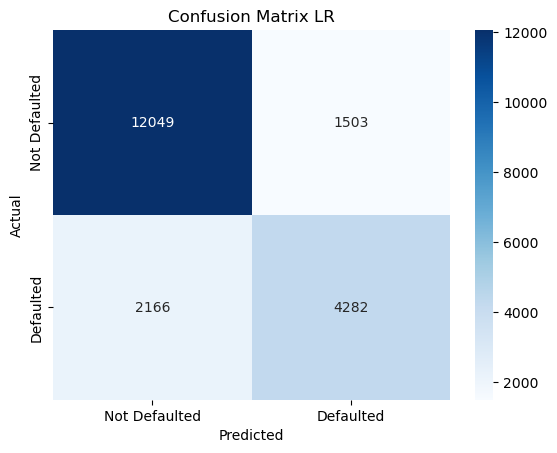

In [236]:
# LogisticRegression
logit = LogisticRegression()

# Fit 
logit.fit(X_train, y_train)

# Predictions
y_pred = logit.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, logit.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Defaulted', 'Defaulted'], yticklabels=['Not Defaulted', 'Defaulted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix LR')
plt.show()

### RandomForestClassifier

Accuracy: 0.8926
Precision: 0.8583333333333333
Recall: 0.798697270471464
F1 Score: 0.8274421593830334
ROC-AUC: 0.9528507771096204

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.94      0.92     13552
         1.0       0.86      0.80      0.83      6448

    accuracy                           0.89     20000
   macro avg       0.88      0.87      0.87     20000
weighted avg       0.89      0.89      0.89     20000



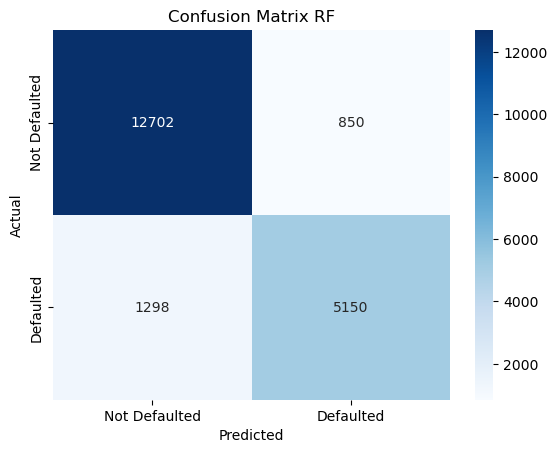

In [238]:
# Random Forest model 
model = RandomForestClassifier()

# Fit 
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Defaulted', 'Defaulted'], yticklabels=['Not Defaulted', 'Defaulted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RF')
plt.show()


### XGBClassifier

Accuracy: 0.8928
Precision: 0.8478823149046233
Recall: 0.8134305210918115
F1 Score: 0.8302991926547412
ROC-AUC: 0.9547348442887758

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92     13552
         1.0       0.85      0.81      0.83      6448

    accuracy                           0.89     20000
   macro avg       0.88      0.87      0.88     20000
weighted avg       0.89      0.89      0.89     20000



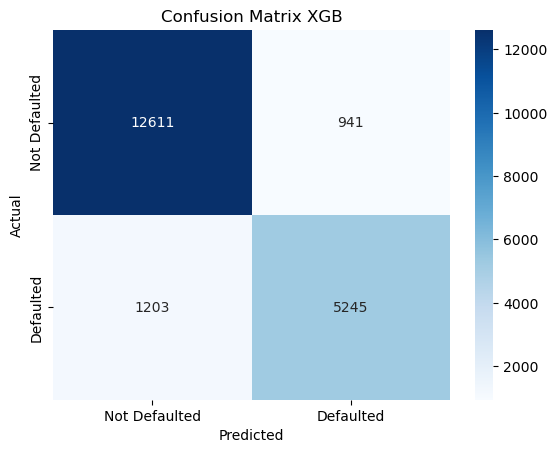

In [241]:
# XGBoost
xgb_model = xgb.XGBClassifier()

# Fit
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Defaulted', 'Defaulted'], yticklabels=['Not Defaulted', 'Defaulted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix XGB')
plt.show()

### GradientBoostingClassifier

Accuracy: 0.8972
Precision: 0.8629752066115702
Recall: 0.8097084367245657
F1 Score: 0.8354936789886381
ROC-AUC: 0.9565419917326077

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.94      0.93     13552
         1.0       0.86      0.81      0.84      6448

    accuracy                           0.90     20000
   macro avg       0.89      0.87      0.88     20000
weighted avg       0.90      0.90      0.90     20000



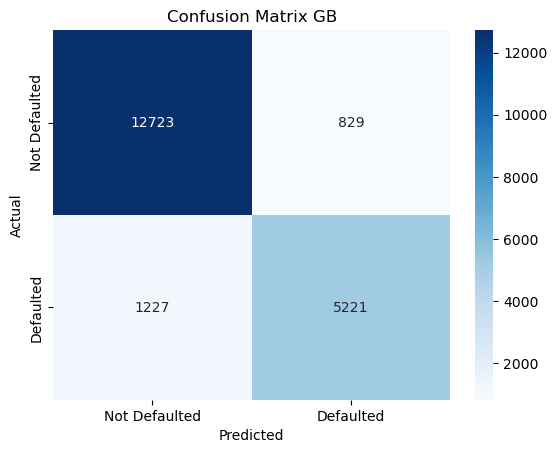

In [243]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Fit
gb.fit(X_train, y_train)

# Predictions
y_pred = gb.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Defaulted', 'Defaulted'], yticklabels=['Not Defaulted', 'Defaulted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix GB')
plt.show()

# Resampling with SMOTE

In [266]:
df['Defaulted'].value_counts() 

# Imbalanced 

Defaulted
0.0    54341
1.0    25659
Name: count, dtype: int64

In [268]:
# Since the data is imbalanced we duplicate examples from the minority class in the training dataset

In [257]:
# Synthetic Minority Oversampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE

print("Before oversampling: ",Counter(y_train))

smote = SMOTE()

#Resampling with SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)
print("After oversampling: ",Counter(y_train_resampled))

# SMOTE can be used to create as many synthetic examples for the minority class as are required.

Before oversampling:  Counter({0.0: 40789, 1.0: 19211})
After oversampling:  Counter({0.0: 40789, 1.0: 40789})


In [270]:
# Models after resampling

Accuracy: 0.76255
Precision: 0.6055410610013666
Recall: 0.7558933002481389
F1 Score: 0.6724149824101538
ROC-AUC: 0.8416223393541942

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.77      0.81     13552
         1.0       0.61      0.76      0.67      6448

    accuracy                           0.76     20000
   macro avg       0.74      0.76      0.74     20000
weighted avg       0.78      0.76      0.77     20000



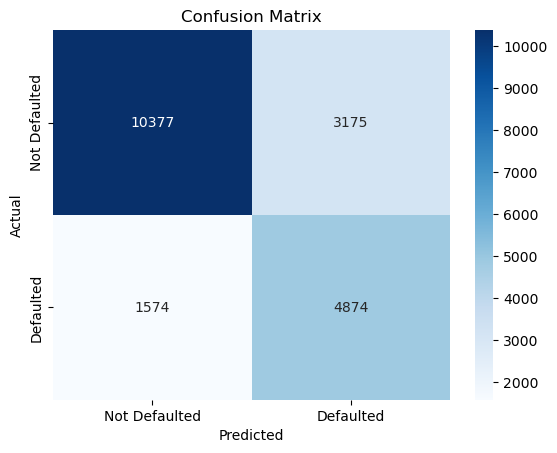

In [272]:
logit = LogisticRegression()

# Fit 
logit.fit(X_train_resampled, y_train_resampled) # Resampled training data

# Predictions
y_pred = logit.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, logit.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Defaulted', 'Defaulted'], yticklabels=['Not Defaulted', 'Defaulted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.88935
Precision: 0.8319485812823326
Recall: 0.823045905707196
F1 Score: 0.8274732985109534
ROC-AUC: 0.950734857838276

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     13552
         1.0       0.83      0.82      0.83      6448

    accuracy                           0.89     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.89      0.89      0.89     20000



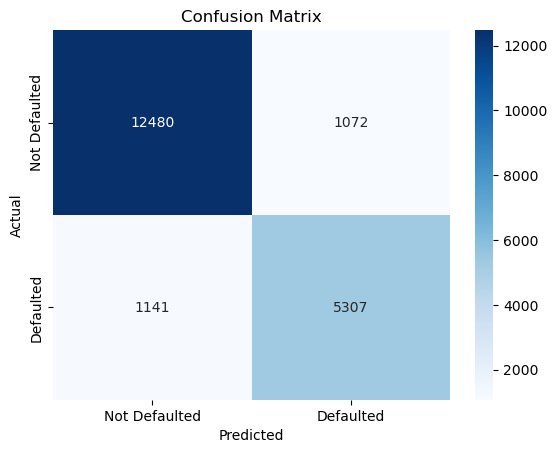

In [274]:
# Random Forest model
model = RandomForestClassifier()

# Fit
model.fit(X_train_resampled, y_train_resampled) # Resampled training data

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Defaulted', 'Defaulted'], yticklabels=['Not Defaulted', 'Defaulted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8928
Precision: 0.8403986080354319
Recall: 0.8239764267990074
F1 Score: 0.8321064996084573
ROC-AUC: 0.954645096014689

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.93      0.92     13552
         1.0       0.84      0.82      0.83      6448

    accuracy                           0.89     20000
   macro avg       0.88      0.87      0.88     20000
weighted avg       0.89      0.89      0.89     20000



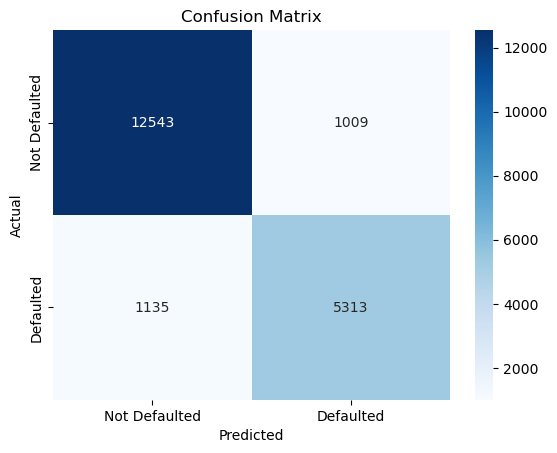

In [277]:
# XGB
xgb_model = xgb.XGBClassifier()

# Fit
xgb_model.fit(X_train_resampled, y_train_resampled) # Resampled training data

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Defaulted', 'Defaulted'], yticklabels=['Not Defaulted', 'Defaulted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.89
Precision: 0.8244729605866178
Recall: 0.8370037220843672
F1 Score: 0.8306910881945513
ROC-AUC: 0.9540260532173105

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     13552
         1.0       0.82      0.84      0.83      6448

    accuracy                           0.89     20000
   macro avg       0.87      0.88      0.87     20000
weighted avg       0.89      0.89      0.89     20000



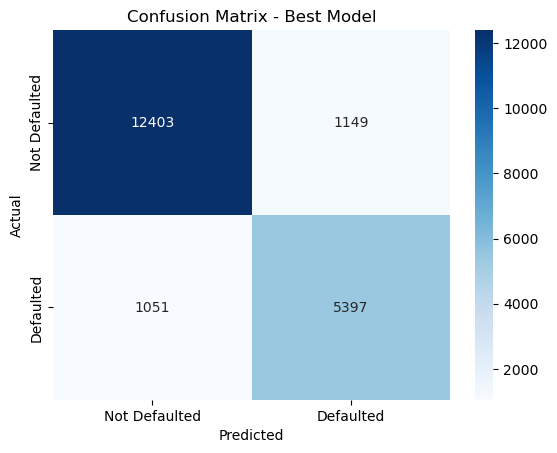

In [278]:
# Gradient Boosting 
gb = GradientBoostingClassifier()

# Fit the model
gb.fit(X_train_resampled, y_train_resampled) # Resampled training data

# Make predictions
y_pred = gb.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Defaulted', 'Defaulted'], yticklabels=['Not Defaulted', 'Defaulted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best Model')
plt.show()

#### Important Findings: 
1. Gradient Boosting Classifier (non-resampled data) maintains good precision and recall while having the greatest accuracy (0.8972) and F1 score (0.8355).

2. XGBoost (both resampled and non-resampled) has a comparable ROC-AUC (0.9547) but somewhat worse accuracy and F1 scores than Gradient Boosting.

3. Random Forest performs quite well overall, but in terms of recall and F1 scores, it performs marginally worse than Gradient Boosting and XGBoost.

4. Despite being interpretable, logistic regression performs poorly on all criteria, particularly when used to resampled data.


#### Best Model Selection
The Gradient Boosting Classifier (non-resampled) is the best model:

It strikes the ideal balance of ROC-AUC, F1 score, recall, and accuracy.
The model is certain to capture a sizable percentage of defaulters due to its strong recall.
Strong success in differentiating between the classes is shown by the high ROC-AUC.

Random Forest may be used as a substitute if interpretability is a major issue, however for best results, gradient boosting is advised.